In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
air = pd.read_csv("Air polltuon in top 10 city of indai in last 19 years.csv")

In [44]:
air.sample(10,random_state=2025)

,Unique ID,City,Date,Measure,Longitude,Latitude,Time Period,Data Value,Air Quality
511,01F5F8D4,Delhi,2015-03-01,PM2.5 (µg/m³),77.125,28.703125,Monthly,95,Moderate
153,01F4C6B4,Delhi,2017-06-01,NO2 (ppb),77.125,28.703125,Monthly,6,Good
872,00B65DC0,Chennai,2006-09-01,SO2 (ppb),80.250,13.085938,Monthly,47,Moderate
1320,006456A4,Kolkata,2023-07-01,PM10 (µg/m³),88.375,22.578125,Monthly,155,Very Poor
1256,0018219C,Delhi,2006-11-01,NO2 (ppb),77.125,28.703125,Monthly,6,Good
1371,00C01817,Mumbai,2016-11-01,PM2.5 (µg/m³),72.875,19.078125,Monthly,122,Poor
325,00F8EA33,Bengaluru,2009-01-01,NO2 (ppb),77.625,12.968750,Monthly,7,Good
1275,01235074,Bengaluru,2011-06-01,"Ozone (O3, ppb)",77.625,12.968750,Monthly,32,Good
1395,00333490,Bengaluru,2002-02-01,PM2.5 (µg/m³),77.625,12.968750,Monthly,123,Poor
1220,003EF1EE,Chennai,2016-05-01,"Ozone (O3, ppb)",80.250,13.085938,Monthly,89,Moderate


In [ ]:
# Data Cleaning

In [52]:
air.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unique ID    1445 non-null   object        
 1   City         1445 non-null   category      
 2   Date         1445 non-null   datetime64[ns]
 3   Measure      1445 non-null   category      
 4   Longitude    1445 non-null   float16       
 5   Latitude     1445 non-null   float16       
 6   Time Period  1445 non-null   category      
 7   Data Value   1445 non-null   int16         
 8   Air Quality  1445 non-null   category      
dtypes: category(4), datetime64[ns](1), float16(2), int16(1), object(1)
memory usage: 107.5 KB


In [9]:
air.describe()

,Longitude,Latitude,Data Value
count,1445.000000,1445.000000,1445.000000
mean,79.241880,19.281400,73.802076
std,5.141098,5.966944,54.812141
min,72.877700,12.971600,5.000000
25%,77.102500,13.082700,29.000000
50%,77.594600,19.076000,55.000000
75%,80.270700,22.572600,111.000000
max,88.363900,28.704100,200.000000


In [3]:
air = air.rename(
    columns = {"District":"City"})

In [4]:
air= air.astype(
    {"City":"category",
     "Measure":"category",
     "Data Value":"int16",
     "Air Quality":"category",
     "Longitude":"float16",
     "Latitude":"float16",
     "Time Period":"category"
    })

In [9]:
air["Date"] = pd.to_datetime(air["Date"],format="%d-%m-%Y")

In [ ]:
# What is the trend of air pollution in the top 3 most polluted cities?

In [160]:
top_3 = air.groupby("City",observed=False)[["Data Value"]].mean().sort_values("Data Value",ascending=False).iloc[0:3].reset_index()
top_3

,City,Data Value
0,Delhi,77.193772
1,Chennai,75.550173
2,Mumbai,74.186851


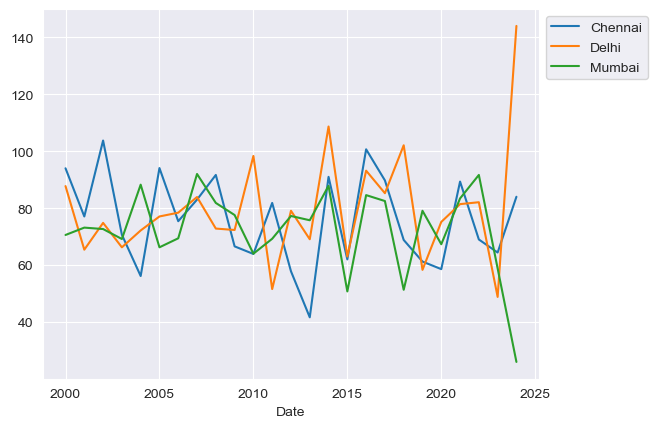

In [178]:
air.loc[air["City"].isin (top_3["City"]),:].pivot_table(
    index = air["Date"].dt.year,
    columns = "City",
    values = "Data Value",
    aggfunc = "mean",
    observed = False
).plot().legend(bbox_to_anchor=(1,1))
plt.show()


In [ ]:
# Which city has the highest average pollution level over the years?

In [184]:
air.groupby("City",observed=False)[["Data Value"]].mean().sort_values("Data Value",ascending=False).iloc[0]

Data Value    77.193772
Name: Delhi, dtype: float64

In [ ]:
# How does the standard deviation of pollution levels compare across cities?

In [186]:
air.groupby("City",observed=False)[["Data Value"]].std()

,Data Value
City,
Bengaluru,52.593237
Chennai,55.541824
Delhi,57.151029
Kolkata,52.887787
Mumbai,55.838243


In [ ]:
# What is the average pollution level for each pollutant across all cities?

In [196]:
air.pivot_table(
    index="City",
    columns = "Measure",
    values = "Data Value",
    aggfunc = "mean",
    observed=False
).round(2)

Measure,NO2 (ppb),"Ozone (O3, ppb)",PM10 (µg/m³),PM2.5 (µg/m³),SO2 (ppb)
City,,,,,
Bengaluru,24.67,61.86,123.30,123.07,27.52
Chennai,28.47,55.86,136.09,127.87,27.17
Delhi,26.98,60.06,132.81,130.30,25.15
Kolkata,29.21,60.76,125.30,122.70,25.77
Mumbai,24.73,58.97,136.38,124.18,27.37


In [ ]:
# Can we visualize the trend of air quality improvement or degradation over time?

In [216]:
air_quality = air.groupby(air["Date"].dt.year)[["Data Value"]].mean().round(2).reset_index()

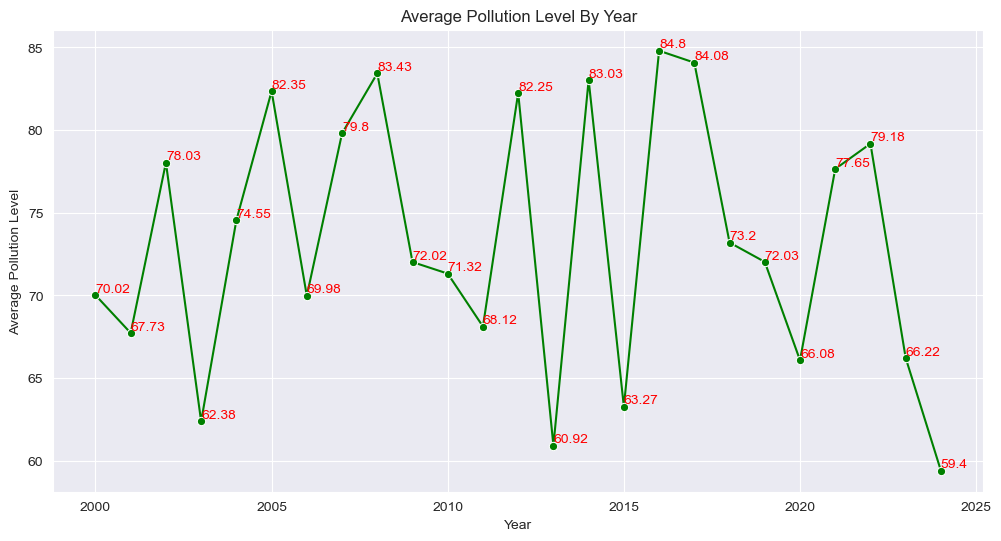

In [238]:
y = []
for year in air_quality["Date"]:
    y.append(year)
v = []
for value in air_quality["Data Value"]:
    v.append(value)

length = len(y)
plt.figure(figsize=(12,6))
sns.lineplot(
    x = "Date",
    y="Data Value",
    data = air_quality,
    marker = "o",
    color = "g"
)
for a,b in zip(y,v):
    plt.text(a,b,str(b),ha="left",va="bottom",color="r")

plt.xlabel("Year")
plt.ylabel("Average Pollution Level")
plt.title("Average Pollution Level By Year")
plt.show()

In [ ]:
# What is the correlation between different pollutants using a heatmap?

In [59]:
pollutants = air.pivot_table(
    index = "City",
    columns = "Measure",
    values = "Data Value",
    observed = False
)

In [61]:
pollutants_co = pollutants.corr()

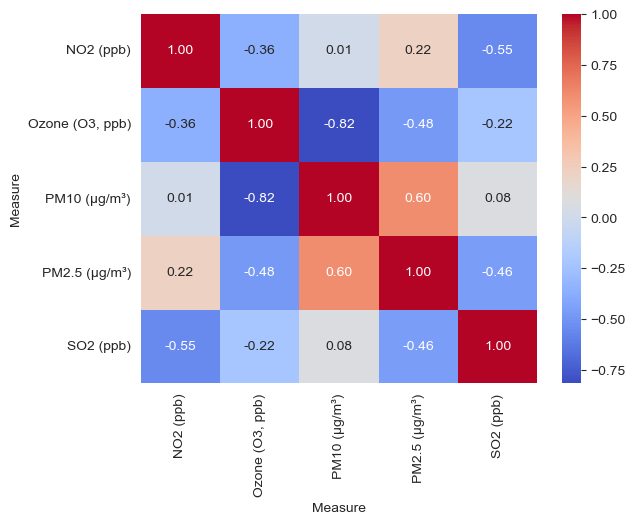

In [63]:
sns.heatmap(data=pollutants_co,annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

In [ ]:
# How does the air quality vary seasonally? (Using boxplots)

In [65]:
season_conditions = [
    (air["Date"].dt.month .isin([12,1,2])),
    (air["Date"].dt.month .isin([3,4,5,6])),
    (air["Date"].dt.month .isin([7,8,9])),
    (air["Date"].dt.month .isin([10,11]))
]

In [67]:
season_output = ["Winter","Summer","Monsoon","Post-Monsoon"]

In [69]:
air["Season"] = np.select(season_conditions,season_output)

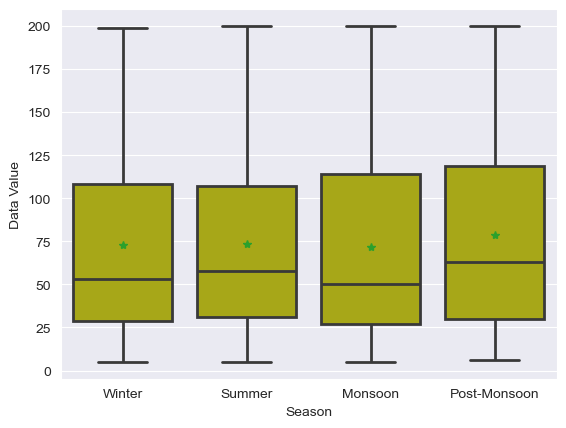

In [109]:
sns.boxplot(
    x="Season",
    y="Data Value",
    data=air,
    showmeans=True,meanprops={"marker":"*"},
    color="y",
    linewidth=2,
    order=["Winter","Summer","Monsoon","Post-Monsoon"])
plt.show()

In [ ]:
# Which cities have the most stable pollution levels over the years?

In [127]:
air.pivot_table(
    index = air["Date"].dt.year,
    columns = "City",
    values = "Data Value",
    aggfunc = "mean",
    observed = False
).style.background_gradient(cmap="RdYlGn_r",axis=1)

City,Bengaluru,Chennai,Delhi,Kolkata,Mumbai
Date,,,,,
2000,53.083333,94.000000,87.750000,44.666667,70.583333
2001,55.416667,77.083333,65.416667,67.583333,73.166667
2002,64.583333,103.750000,74.833333,74.333333,72.666667
2003,61.666667,70.666667,66.250000,44.166667,69.166667
2004,100.250000,56.166667,72.166667,55.916667,88.250000
2005,75.083333,94.083333,77.083333,99.250000,66.250000
2006,81.416667,75.416667,78.416667,45.250000,69.416667
2007,63.166667,83.000000,83.916667,76.916667,92.000000
2008,89.333333,91.666667,72.833333,81.500000,81.833333


In [ ]:
# Plot a time series analysis of pollution trends in Delhi.

In [153]:
delhi_trend = air.loc[air["City"] == "Delhi",:].groupby(air["Date"].dt.year)[["Data Value"]].mean().round(2).reset_index()

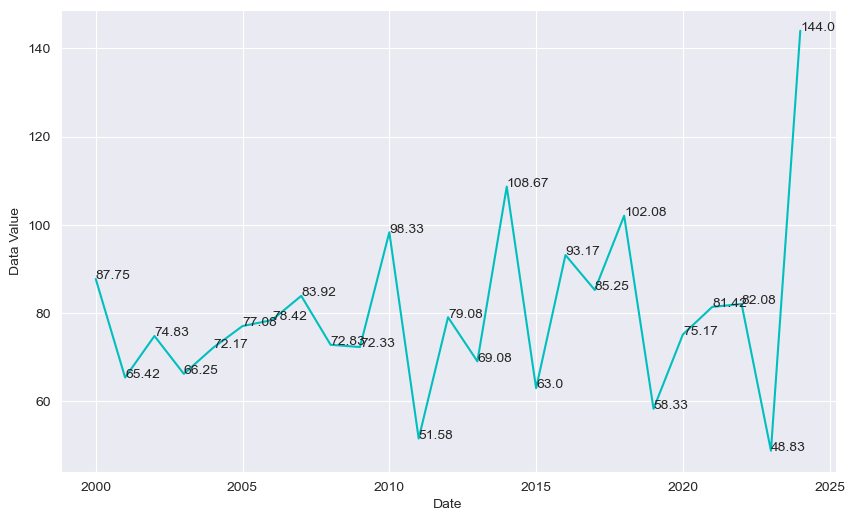

In [197]:
y = []
for years in delhi_trend["Date"]:
    y.append(years)
v = []
for value in delhi_trend["Data Value"]:
    v.append(value)

plt.figure(figsize=(10,6))
sns.lineplot(
    x = "Date",
    y = "Data Value",
    data = delhi_trend,
    color = "c"
)
for a,b in zip(y,v):
    plt.annotate(str(b),(a,b))
plt.show()

In [ ]:
# What is the monthly distribution of air pollution levels?

In [159]:
month_wise_pollution = air.groupby(air["Date"].dt.strftime("%B"),observed = False)[["Data Value"]].mean().round(2).reset_index()

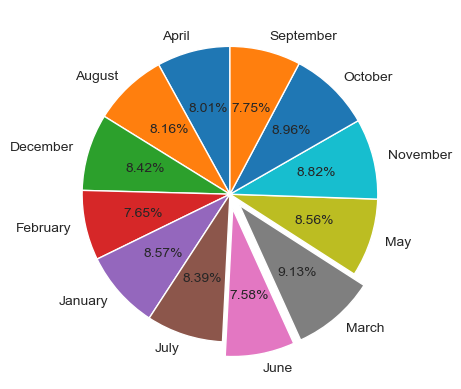

In [163]:
ex = []
for a in range(1,13,1):
    ex.append(a*0.0)
ex[6] = 0.1
ex[7] = 0.1    
plt.pie(
    x = month_wise_pollution["Data Value"],
    labels = month_wise_pollution["Date"],
    explode= ex,
    autopct= "%0.2f%%",
    startangle= 90
)
plt.show()

In [ ]:
# How does pollution vary across latitude and longitude using scatter plots?

In [11]:
measure_filtered = air.loc[air["Measure"].str.startswith("PM10"),:]

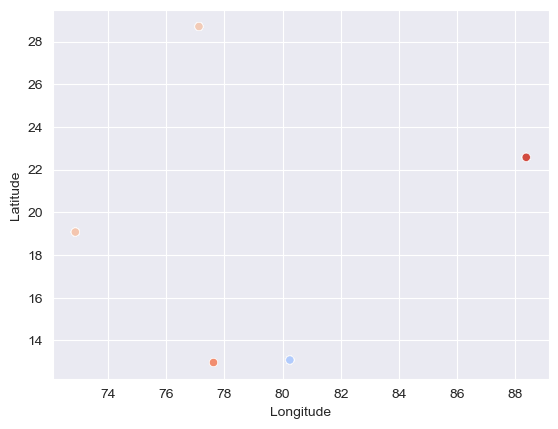

In [15]:
sns.scatterplot(
    x = "Longitude",
    y = "Latitude",
    data = measure_filtered,
    c = measure_filtered["Data Value"],
    cmap = "coolwarm"
)
plt.show()

In [ ]:
# What is the impact of festival seasons (Diwali, New Year) on pollution levels?

In [303]:
air.drop("Season",axis=1,inplace=True)

In [307]:
festive_season_conditions = [
    (air["Date"].dt.month .isin([10,11])),
    (air["Date"].dt.month .isin([12,1]))
]

In [309]:
festive_season_output = ["Diwali/Puja","New Year eve"]

In [311]:
air["Festive_Season"] = np.select(festive_season_conditions,festive_season_output,default="Normal")

In [321]:
festive_pollution = air.groupby("Festive_Season",observed=False)[["Data Value"]].mean().round(2).reset_index()

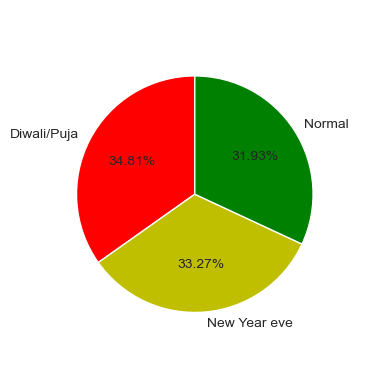

In [365]:
plt.pie(
    x = festive_pollution["Data Value"],
    labels = festive_pollution["Festive_Season"],
    autopct = "%0.2f%%",
    startangle=90,
    radius= 0.8,
    colors = ["r","y","g"]
)
plt.show()

In [ ]:
# Plot a histogram of the distribution of different air quality categories.

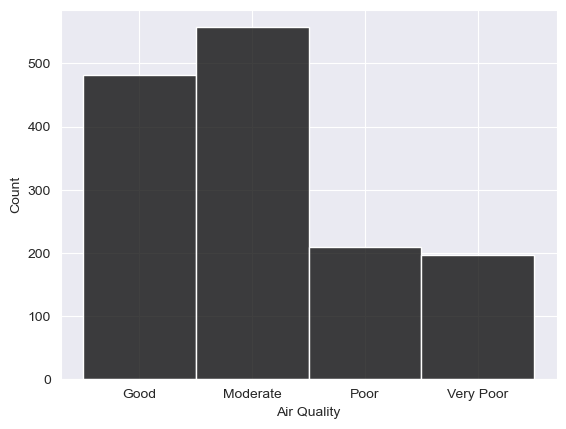

In [385]:
sns.histplot(
    x = "Air Quality",
    data = air,
    color = "k"
)
plt.show()

In [ ]:
# Identify the city with the cleanest air over the past 5 years.

In [25]:
air.loc[air["Date"].dt.year >= 2019,:].groupby("City",observed=False)[["Data Value"]].mean().reset_index().sort_values("Data Value")

,City,Data Value
1,Chennai,68.770492
0,Bengaluru,70.032787
2,Delhi,70.393443
4,Mumbai,75.245902
3,Kolkata,75.672131


In [ ]:
# Compare NO₂ levels in industrial vs. non-industrial cities.

In [29]:
air["Industrial/Non-Industrial"] = np.where(air["City"]=="Bengaluru","Industrial","Non-Industrial")

In [37]:
air.loc[air["Measure"].str.startswith("NO2"),:].groupby("Industrial/Non-Industrial",observed=False)[["Data Value"]].mean().round(2)

,Data Value
Industrial/Non-Industrial,
Industrial,24.67
Non-Industrial,27.31


In [ ]:
# Can we detect any outliers in pollution data using boxplots?

In [ ]:
# No

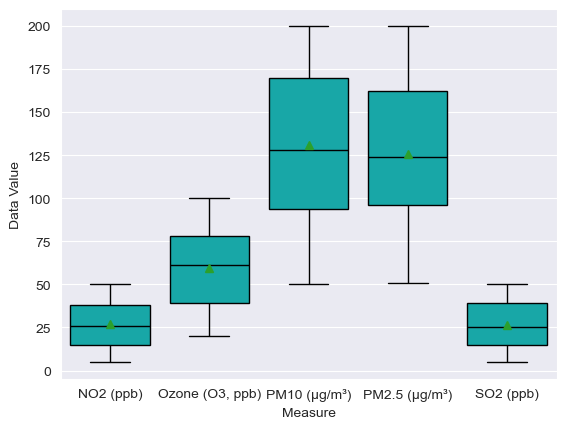

In [53]:
sns.boxplot(
    x = "Measure",
    y = "Data Value",
    data = air,
    color = "c",
    showmeans = True,
    linecolor = "k"
)
plt.show()

In [ ]:
# How do different pollutants contribute to "Poor" air quality?

In [65]:
air.loc[air["Air Quality"] == "Poor",:].groupby("Measure",observed=False)[["Data Value"]].mean().round(2).fillna("Data Not Found")

,Data Value
Measure,
NO2 (ppb),Data Not Found
"Ozone (O3, ppb)",Data Not Found
PM10 (µg/m³),126.79
PM2.5 (µg/m³),122.64
SO2 (ppb),Data Not Found


In [ ]:
# Create a bar chart showing the worst air quality cities.

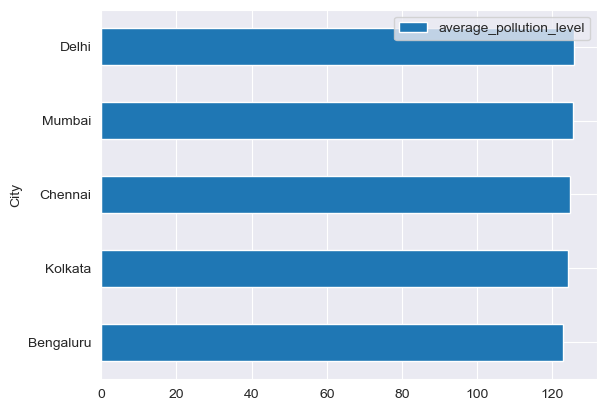

In [99]:
air.loc[air["Air Quality"] == "Poor",:].groupby("City",observed = False).agg(average_pollution_level=("Data Value","mean")).round(2).reset_index().sort_values("average_pollution_level").plot.barh(x="City")
plt.show()

In [ ]:
# What are the top 3 months when pollution levels are at their peak?

In [125]:
air.groupby(air["Date"].dt.strftime("%B"),observed = False).agg(average_pollution_level = ("Data Value","mean")).round(2).sort_values("average_pollution_level",ascending = False).iloc[0:3]

,average_pollution_level
Date,
March,80.87
October,79.35
November,78.08
